In [107]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Potentially useful astropy stuff
import astropy.io.ascii as ascii
from astropy.table import Table
from astropy.io import fits
from astropy.stats import LombScargle
from astropy.stats import sigma_clipped_stats
from astropy import constants as const
from astropy import units as u

#For reading in and organizing data
import pandas as pd
import requests
import json

#Making Figures look nice
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18

In [75]:
#From NASA's Exoplanet Archive API:
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2targets&select=epic_number,k2_dist,k2_teff,k2_rad,k2_mass,k2_bjmag,k2_vjmag,k2_gmag,k2_imag&format=CSV"

In [76]:
df = pd.read_csv(url) #Reads above CSV table into a pandas dataframe

In [77]:
df #Have a look at the dataframe

,epic_number,k2_dist,k2_teff,k2_rad,k2_mass,k2_bjmag,k2_vjmag,k2_gmag,k2_imag
0,60018365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60018369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60018371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60018372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60018374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,60018376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,60018377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,60018378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,60018380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,60018381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.columns #So we can see all the column labels

Index(['epic_number', 'k2_dist', 'k2_teff', 'k2_rad', 'k2_mass', 'k2_bjmag',
       'k2_vjmag', 'k2_gmag', 'k2_imag'],
      dtype='object')

Let's make a quick and dirty H-R diagram:

In [114]:
df['k2_L'] = 4 * np.pi * (df['k2_rad'] * const.R_sun)**2 * const.sigma_sb * df['k2_teff']**4

In [115]:
df['k2_teff'].max(),df['k2_teff'].min()

(33037.0, 1708.0)

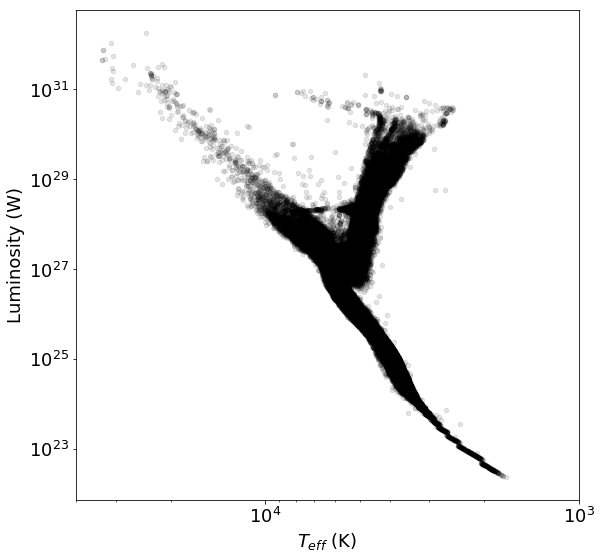

In [116]:
df.plot.scatter(x='k2_teff',y='k2_L', loglog=True, color='k', s=20, alpha=0.1, figsize=(9,9))
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)')

Covey et al. (2007) lists FGKM spectral types as a function of g-i color. Maybe can use this?

In [95]:
df['k2_g-i'] = df['k2_gmag'] - df['k2_imag']
df['k2_g-i']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
392215    0.467
392216      NaN
392217    0.684
392218    0.574
392219      NaN
392220    2.587
392221    0.602
392222    2.393
392223    3.311
392224    1.029
392225    0.652
392226      NaN
392227    0.313
392228    0.299
392229    0.435
392230    2.947
392231    0.957
392232    2.094
392233    0.425
392234    0.596
392235    0.282
392236    0.830
392237    2.069
392238    0.452
392239    0.902
392240    0.557
392241    0.985
392242    0.527
392243    2.455
392244    2.509
Name: k2_g-i, Length: 39